In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('user_MNET1.xls',sheet_name=['reactions','chemicals','compartments','properties'])
df

{'reactions':                Sid                                               Reac  \
 0        mnxr01c11                1 MNXM01@MNXC11 <==> 1 MNXM1@MNXC11   
 1         mnxr01c2                  1 MNXM01@MNXC2 <==> 1 MNXM1@MNXC2   
 2         mnxr01c3                  1 MNXM01@MNXC3 <==> 1 MNXM1@MNXC3   
 3        mnxr01c36                1 MNXM01@MNXC36 <==> 1 MNXM1@MNXC36   
 4         mnxr01c4                  1 MNXM01@MNXC4 <==> 1 MNXM1@MNXC4   
 ...            ...                                                ...   
 1314  reacF152B164            1 MNXM530@MNXC2 <==> 1 MNXM530@BOUNDARY   
 1315  reacF4CCC670         1 MNXM733607@MNXC2 <==> 1 MNXM733607@MNXC3   
 1316  reacF7C81625         1 MNXM726598@MNXC2 <==> 1 MNXM726598@MNXC3   
 1317  reacF8442E5F  1 MNXM1102419@MNXC3 + 1 MNXM1108387@MNXC3 + 1 ...   
 1318  reacF8A08D5C    1 MNXM1108387@MNXC2 <==> 1 MNXM1108387@BOUNDARY   
 
                  Source    Equa        EC  Pathway Xref  
 0                   NaN  MNXR01      

In [3]:
dic_comp = dict(zip(df['compartments']['Sid'].to_list(), df['compartments']['Source'].to_list()))
dic_comp

{'BOUNDARY': 'BOUNDARY',
 'MNXC11': 'r',
 'MNXC2': 'e',
 'MNXC3': 'c',
 'MNXC36': 'a',
 'MNXC4': 'm',
 'MNXC6': 'n'}

In [4]:
def translate_comp(sid):
    dic_comp = {'BOUNDARY': 'BOUNDARY',
                'MNXC11': 'r',
                'MNXC2': 'e',
                'MNXC3': 'c',
                'MNXC36': 'a',
                'MNXC4': 'm',
                'MNXC6': 'n'}
    return dic_comp[sid]

def translate_spec(sid):
    did = sid.split('@')
    comp = translate_comp(did[1])
    pos = df['chemicals'][df['chemicals']['Sid']==did[0]]['Source'].to_list()
    if type(pos[0])!=float:
        pos = pos[0].split(';')[0][2:-2]+'_'+comp
        return pos
    return

def translate_reac(sid):
    return df['reactions'][df['reactions']['Sid']==sid]['Source'].to_list()[0]

def translate(row):
    if row['Scope']=='spec':
        return translate_spec(row['ID'])
    if row['Scope']=='reac':
        return translate_reac(row['ID'])
    return

In [5]:
df['properties'][df['properties']['Scope']=='spec']
df['properties']['translate']= df['properties'].apply(translate, axis=1)
df['properties']

,Scope,ID,Key,Value,translate
0,prop,BC-b,desc,Reaction classified with respect to their lowe...,None
1,prop,BC-b,scope,reac,None
2,prop,BC-b,type,enum,None
3,prop,BC-p,desc,Presence/absence of asssociated genes or proteins,None
4,prop,BC-p,scope,reac,None
...,...,...,...,...,...
15237,spec,WATER@MNXC3,FBA-s,1293.137299,C00001_c
15238,spec,WATER@MNXC36,FBA-s,236.348865,C00001_a
15239,spec,WATER@MNXC4,FBA-s,109.066294,C00001_m
15240,spec,WATER@MNXC6,FBA-s,0,C00001_n


In [6]:
df['properties'][df['properties']['Scope']=='reac']

,Scope,ID,Key,Value,translate
691,reac,mnxr01c11,BC-b,bidi,NaN
692,reac,mnxr01c11,BC-p,asso,NaN
693,reac,mnxr01c11,BC-t,enzy,NaN
694,reac,mnxr01c11,BLO-c,A,NaN
695,reac,mnxr01c11,FBA-c,nonz,NaN
...,...,...,...,...,...
12557,reac,reacF8A08D5C,FBA-c,nonz,EXC_BOTH_C12126_e
12558,reac,reacF8A08D5C,FBA-f,-46.604629,EXC_BOTH_C12126_e
12559,reac,reacF8A08D5C,GCR-r,C-EB559438,EXC_BOTH_C12126_e
12560,reac,reacF8A08D5C,RKO-c,unaf,EXC_BOTH_C12126_e


# Basic classifications of the reactions
The reactions in a model can be partitioned according to the following independent schemes:

Usually a single growth reaction represents the BIOMASS production. Source or sink boundary reactions involve the BOUNDARY special compartment. The reactions of transport involve at least two compartments. The remaining reactions occur in a single compartment and are tagged as enzymatic
Some reactions have one or several protein complexes assigned to them. The other reactions remain orphan because the proteins that catalyzed them are unknown, or because they occur spontaneously
The flux on a reaction can be constrained by the lower and upper bounds that can be placed on it. The following case are recognized: reversible i.e. no flux constraints; directed i.e. the reaction can only proceed in one direction; null i.e. no flux is allowed; restricted with at least one non-zero/non-infinite bound, multiple when more than one pair of bounds are defined on the reaction



BC-t |	#reac
|-------|-------|
boun<br>External source or sink, i.e. boundary reactions involving the BOUNDARY special compartment.| 	242
grow<br>Usually a single growth reaction representing the BIOMASS production |	1
enzy<br>Enzymatic reaction occuring in a single compartment 	| 678
tran<br>Transport reaction involving more than one compartment |	398
Total: 	|1319

BC-b |	#reac
|-------|------|
oned<br>Uni-directional reactions |	184
bidi<br>Bi-directional, i.e. reversible reaction |	1133
mult<br>Reaction with more than one pair of bounds 	|0
null<br>Reaction with zero upper and lower bounds |	1
othr<br>None of the above: Reaction with particular bound constraints 	|1
Total: 	|1319

| BC-p  |  #reac |
|-|-|
asso<br>Reaction associated with one or several proteins/genes |	595	
orph<br>Orphan reaction with no associated protein/gene |	724
Total: |	1319

Flux balance analysis of user_MNET1
Result	Comment
Biomass production:
(flux on the growth reaction) 	1.60e-01

|FBA-f||
|----|----|
|minimal value|	-5.00e+01
|average value|	-2.17e+00
|maximal value|	5.00e+01

FBA-c |	#reac
|------|------|
extr<br>Reaction flux is close to either the model (global) lower or upper bound |	430
boun<br>Reaction flux is close to an upper or a lower bound specific to a reaction, i.e. a bound that is different from the (global) lower or upper bound |	1
nonz<br>Reaction flux is not zero and not close to the reaction bounds |	430
zero<br>Reaction flux is zero or close to zero (very small numbers close to zero may by due to numerical imprecision) |	457
cons<br>Reaction flux is fixed by the equal lower or upper bounds (possibly zero) |	1
Total: |	1319

FBA-s||
|----|----|
minimal value|	0.00e+00
average value|	3.09e+01
maximal value|	2.84e+03

Flux balance analysis (FBA) has been widely used to analyze and characterize genome-scale metabolic models. Of particular interest is whether an organism can grow given certain media conditions or whether a single biotechnological relevant metabolite or a combination of metabolites can be produced (for details, see Orth et al. 2010). In addition, FBA allows examining a particular flux distribution of all reactions within the network's context.
The biomass or growth reaction of an organism (model) mimics its chemical dry-weight components with their proper ratios (encoded in the corresponding stoichiometric coefficients) that are necessary for this organism to grow.
The output shows the biomass flux and its corresponding flux distribution summarized into five categories: zero indicates whether a reaction flux is zero or close to it (possibly due to numerical imprecision), extr indicates whether it is close to a global maximum or minimum bounds of the model (within 1%), boun indicates whether it is close to a specific reaction upper or lower bound (that is different from the global maximum or minimum bound), cons is used for externally fixed flux (e.g. maintenance), and otherwise * is used.
Note: FBA can only be used if both an optimization function and external media conditions are defined for the model of interest. 

# Blocked reactions analysis

BLO status schema<br>
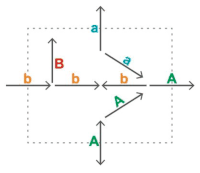<br>
From MetaNetX/MNXref: unified namespace for metabolites and biochemical reactions in the context of metabolic models
Sébastien Moretti, Van Du T Tran, Florence Mehl, Mark Ibberson, Marco Pagni
Nucleic Acids Research (2021), 49(D1):D570-D574

A status can be attributed to every reaction in a network with respect to its capacity to carry a non-zero flux: A, the reaction can carry a non-zero flux in the unaltered network; a, the reaction can carry a flux after all boundary (exchange) reactions are set to bi-directional; b, the reaction can carry a flux after all reactions are set to bi-directional; B, the reaction cannot carry any flux because of the network topology, for example because of a dead-end metabolite; U, status is unknown. The computation is performed using a variant of the flux variability algorithm (FVA).

| Result |	|
|-----------|-----------|
BLO-c |	#reac
A<br>Non-zero flux in the original model| 	1006
a<br>Non-zero flux only after setting all external reactions to bi-directional |	6
b<br>Non-zero flux only after setting all reactions to bi-directional |	22
B<br>Zero flux reaction, because of the network topology |	285
U<br>Unknown status |	0
Total: |	1319



# Gene/Peptide knockout analysis  

A simulation of a gene/peptide knockout is realized by constraining the flux of all affected reaction(s) to zero in an FBA analysis and examining the resulting biomass flux. Hence, it is possible to determine, for example, the essentiality of a gene/peptide and subsequently compare it to published experimental data.
Each single gene/peptide knockout is classified as lethal or non-lethal based on its fraction of wildtype biomass flux. In particular, non-lethal knockouts are either classified as impaired, unaffected, or improved.
Note: PKO can only be used if both an optimization function, i.e. a biomass reaction and external media conditions (boundary conditions) are defined and if the initial model is viable (non-zero biomass reaction flux). 

| Result||
|--------|---------|
|PKO-c | #pept| |
|impr<br>Gene/peptide which single knockout improves growth<br>1.05 < PKO-c| 	0|
|unaf<br>Gene/peptide which single knockout has no significant effect on growth<br>0.95 < PKO-c ≤ 1.05| 	271|
|impa<br>Gene/peptide which single knockout decrease but not abolish growth<br>0.05 < PKO-c ≤ 0.95 	|0|
|leth<br>Gene/peptide which single knockout seriously affect growth<br>PKO-c ≤ 0.05 	|55|
|Total:| 	326|



# Reactions knockout analysis

A reaction knockout is defined by constraining its flux to zero in an FBA analysis and examining the resulting biomass flux. Hence, it is possible to determine, for example, the essentiality of reaction knockouts and compare them to published data (validation: comparing of in silico simulations with experimental results) or propose, for example, new antibiotic drug targets, growth-enhancing mutations, or study the altered flux distributions.
Each single reaction knockout is classified as lethal or non-lethal based on its fraction of wildtype biomass flux. In particular, non-lethal knockouts are either classified as impaired, unaffected, or improved.
Note: RKO can only be used if both an optimization function (biomass growth) and external media conditions (boundary conditions) are defined and if the initial model is viable (non-zero biomass reaction flux).

|Result||
|---|---|
RKO-c 	|#reac
impr<br>Reaction which single knockout improves growth<br>1.05 < RKO-c |	0
unaf<br>Reaction which single knockout has no significant effect on growth<br>0.95 < RKO-c ≤ 1.05 |	1197
impa<br>Reaction which single knockout decrease but not abolish growth<br>0.05 < RKO-c ≤ 0.95 |	0
leth<br>Reaction which single knockout seriously affect growth<br>RKO-c ≤ 0.05 |	122
Total: |	1319



# Groups of coupled reactions

Based on the stoichiometric matrix it is possible to subdivide reactions into groups of coupled reactions. Coupled reactions are constrained by the network structure to always carry the same flux (up to a scaling factor). For example, if the bounds of a single reaction within such a group are set to zero, the fluxes of the remaining reactions in this group are also zero.
Applications and details are described in

    Steffen Klamt and Jorg Stelling. Stoichiometric and constraint-based modeling. In Zoltan Szallasi, Vipus Periwal, and Jorg Stelling, editors, Systems Modeling in Cellular Biology. MIT Press (Cambridge/MA), 2006.

It is also possible to detect both single reactions and groups of coupled reactions that cannot carry a non-zero flux in steady state.
The following terms summarize the "GCR" results:

- **C-string** This identifier describes a coherent group of at least two reactions: non-zero (coupled) fluxes at steady state are possible for these reactions
- **I-string** This identifier describes an incoherent group of at least two reactions: only zero fluxes at steady state are possible for these reactions. Note that (many) incoherent reaction groups involve model boundary reactions (for substrate uptake or product secretion) that are already part of a model to potentially study altered media conditions.
- **zero-flux** This identifier describes all (singleton/uncoupled) reactions that cannot carry a flux at steady state. These reactions can be safely removed from the model w.r.t. all analyses employing the steady-state assumption, like FBA.
- **singleton** This identifier describes all reactions that are not participating in a coupled reaction group: each reaction forms a group by itself; for convenience they are summarized here.

Finally, it is often possible to describe a group of coupled reactions by one or more metabolites (compartmentalized chemical compounds) that are nowhere else found in the studied model: these metabolites are considered as diagnostic for the respective group.

|GCR-r|#reac|
|--|--|
|incoherent(I)|0|
|singleton|211|
|zero-flux|285|